In [12]:
import xarray as xr
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import math
from xhistogram.xarray import histogram
%load_ext autoreload
%autoreload 2
import pei.myfunctions as mf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data

In [135]:
# Load average daily temperature data
ds = xr.open_dataset('../data/processed/t_ref.rcp85.ens3mean.1950_2100.nc')

# Load max daily temperature data
ds_max = xr.open_dataset('../data/processed/t_ref_max.rcp85.ens3mean.1950_2100.nc')

# Load area data
rootdir = '/local/ss23/GFDL_LEs/ATM/'
filename_area = 'land_static.nc'
path_area = rootdir+filename_area
land_area = xr.open_dataset(path_area)['land_area']

## Histogram Function

In [130]:
# Function to generate histogram
def hist(ds,ax):
    # Get range of data
    histmin = math.floor(ds.min())
    histmax = math.ceil(ds.max())
    
    # Span range of data with 8 bins
    bins = np.linspace(histmin,histmax,10)
    
    # Create histogram
    h = histogram(ds,bins=[bins])
    h.plot(ax=ax)
    
    if histmax < 40:
        ax.set_xlim(right = 40)
    
    # Percentage of days above threshold temperature
    freq = round((len(np.where(ds.values > 35)[0])/365.0)*100,2)
    return freq

## Make Histograms: t_ref

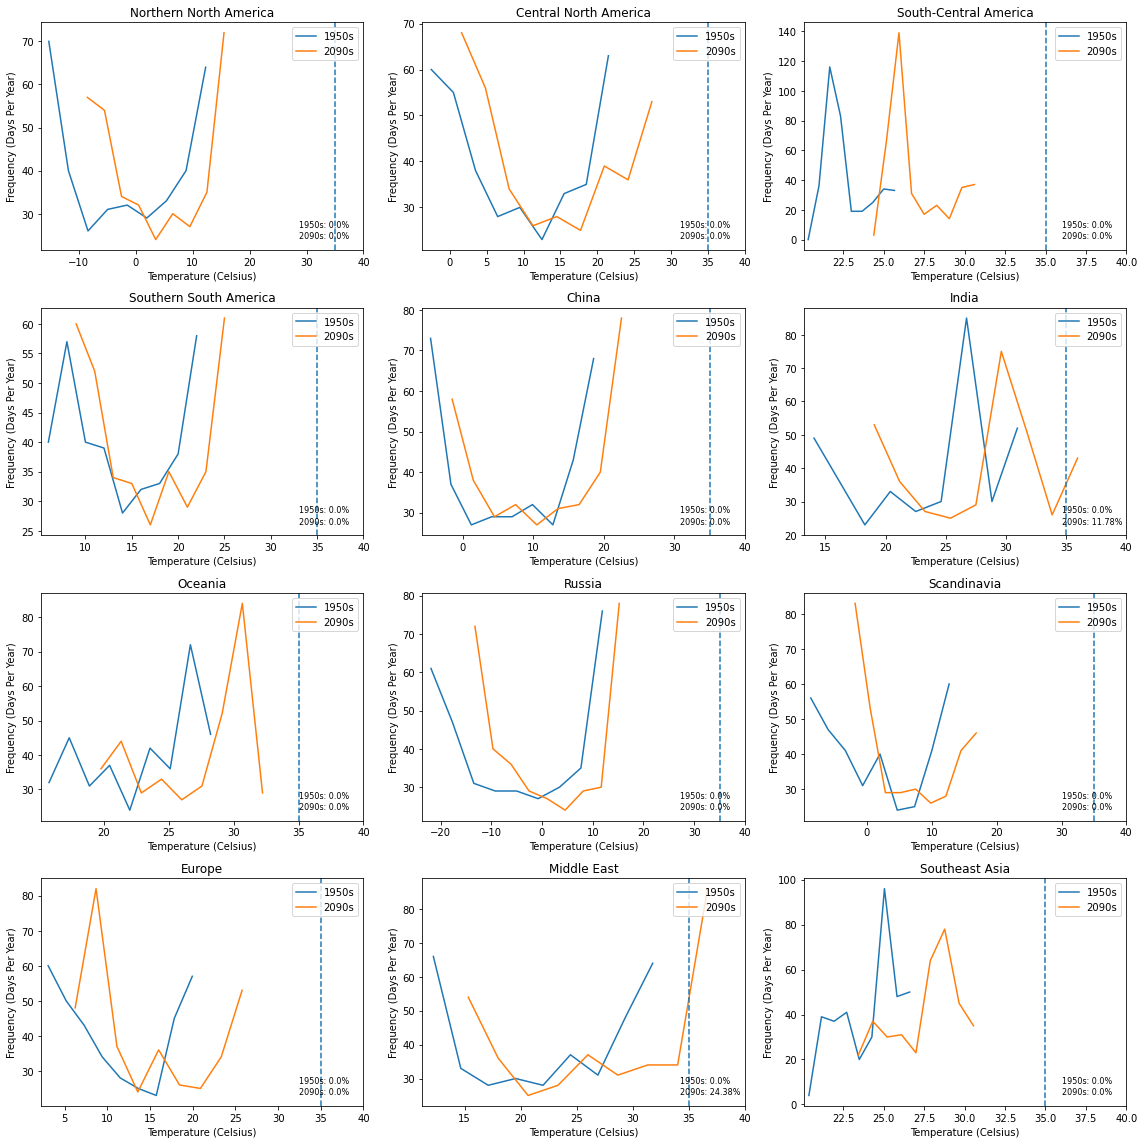

In [132]:
# Average daily climatology for 1950s and 2090s
ds_1950 = ds.isel(time=slice(0,3650)).groupby('time.dayofyear').mean()
ds_2090 = ds.isel(time=slice(-3650,None)).groupby('time.dayofyear').mean()

# List of regions to plot
regions = ['Northern North America','Central North America','South-Central America','Southern South America','China','India', \
          'Oceania','Russia','Scandinavia','Europe','Middle East','Southeast Asia']

# Create figure and axes
fig, axs = plt.subplots(figsize=(16,16),nrows=4,ncols=3)

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Area-weighted regional data
    regional_1950 = mf.area_weighted(ds_1950,land_area,region)['t_ref']-273
    regional_2090 = mf.area_weighted(ds_2090,land_area,region)['t_ref']-273

    # Get correct axis
    ax = axs[int(index/3)][index%3]
    index+=1
    
    # Plot histograms
    freq1 = hist(regional_1950,ax)
    freq2 = hist(regional_2090,ax)
    
    ax.text(0.8,0.1,'1950s: ' + str(freq1) + '%',transform=ax.transAxes,fontsize=8)
    ax.text(0.8,0.05,'2090s: ' + str(freq2) + '%',transform=ax.transAxes,fontsize=8)
    
    # Set legend, axis labels, title
    ax.legend(['1950s','2090s'],loc='upper right')
    ax.axvline(35,linestyle='--')
    ax.set_xlabel('Temperature (Celsius)')
    ax.set_ylabel('Frequency (Days Per Year)')
    ax.set_title(region)
    
plt.tight_layout()

## Make Histogram: t_ref_max

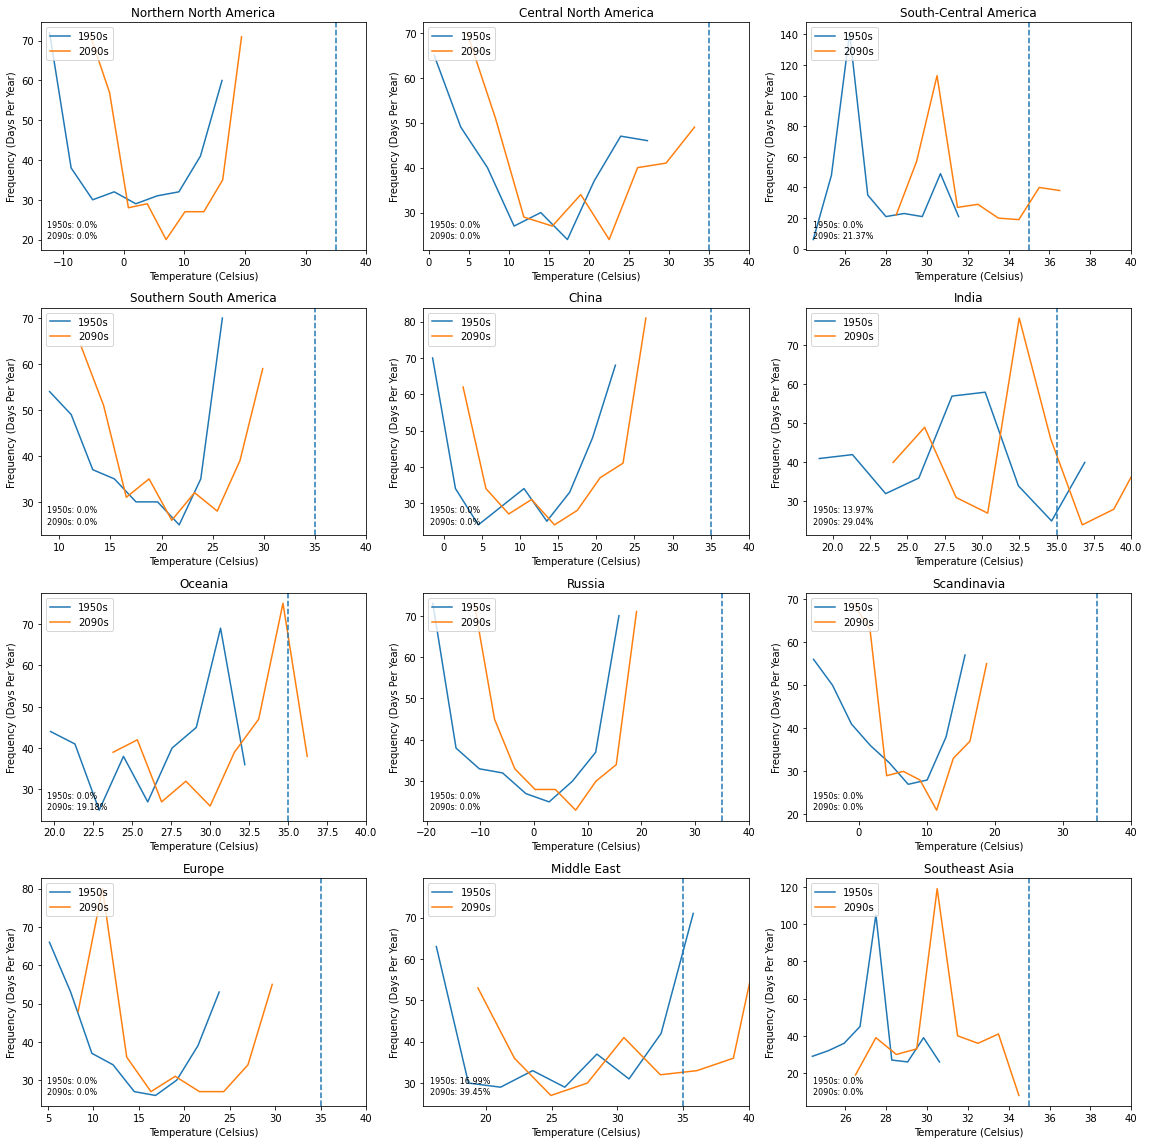

In [136]:
# Average daily climatology for 1950s and 2090s
ds_1950 = ds_max.isel(time=slice(0,3650)).groupby('time.dayofyear').mean()
ds_2090 = ds_max.isel(time=slice(-3650,None)).groupby('time.dayofyear').mean()

# List of regions to plot
regions = ['Northern North America','Central North America','South-Central America','Southern South America','China','India', \
          'Oceania','Russia','Scandinavia','Europe','Middle East','Southeast Asia']

# Create figure and axes
fig, axs = plt.subplots(figsize=(16,16),nrows=4,ncols=3)

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Area-weighted regional data
    regional_1950 = mf.area_weighted(ds_1950,land_area,region)['t_ref_max']-273
    regional_2090 = mf.area_weighted(ds_2090,land_area,region)['t_ref_max']-273

    # Get correct axis
    ax = axs[int(index/3)][index%3]
    index+=1
    
    # Plot histograms
    freq1 = hist(regional_1950,ax)
    freq2 = hist(regional_2090,ax)
    
    ax.text(0.02,0.1,'1950s: ' + str(freq1) + '%',transform=ax.transAxes,fontsize=8)
    ax.text(0.02,0.05,'2090s: ' + str(freq2) + '%',transform=ax.transAxes,fontsize=8)
    
    ax.axvline(35,linestyle='--')
    
    # Set legend, axis labels, title
    ax.legend(['1950s','2090s'],loc='upper left')
    ax.set_xlabel('Temperature (Celsius)')
    ax.set_ylabel('Frequency (Days Per Year)')
    ax.set_title(region)
    
plt.tight_layout()
fig.savefig('maxhist.png')